In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from lasvm import LaSVM

In [2]:
breast_cancer = load_breast_cancer()

x = breast_cancer['data']
y = breast_cancer['target']

x.shape, y.shape

((569, 30), (569,))

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

x_train.shape, x_test.shape

((455, 30), (114, 30))

### (Offline) SVC

In [4]:
svc = SVC().fit(x_train, y_train)

y_pred = svc.predict(x_test)
acc_svc = (y_test == svc.predict(x_test)).mean()

print('accuracy:', acc_svc)

accuracy: 0.9210526315789473


### LaSVM

In [5]:
n_start = 2

pos_id = np.where(y_train == 1)[0][:n_start]
neg_id = np.where(y_train == 0)[0][:n_start]

pos_samples = x_train[pos_id]
neg_samples = x_train[neg_id]

lasvm = LaSVM().initialize(pos_samples, neg_samples).fit(x_train, y_train, finalize=True)

print('accuracy:', (y_test == lasvm.predict(x_test)).mean())

accuracy: 0.9298245614035088


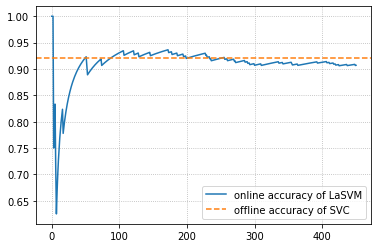

In [6]:
acc_lasvm = lasvm.history['acc']

plt.plot(acc_lasvm, label='online accuracy of LaSVM')
plt.axhline(acc_svc, c='C1', ls='dashed', label='offline accuracy of SVC')

plt.grid(ls='dotted')
plt.legend(loc='lower right')

plt.show()